# Банки - сегментация пользователей по потреблению

**Цель исследования**: Проанализировать данные клиентов регионального банка, определить основные причины оттока клиентов и выработать рекомендации по их удержанию.

**Задачи исследования:**
- Провести исследовательский анализ данных,
- Сегментировать пользователей на основе данных о количестве потребляемых продуктов,
- Проверить статистические гипотезы:
    - между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, есть различие в доходах;
    - доля активных клиентов среди тех, кто пользуется кредитной картой и тех, кто не пользуется, равна

**Для анализа доступны данные  о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.**

**Состав данных:**
- *userid* — идентификатор пользователя,
- *score* — баллы кредитного скоринга,
- *City* — город,
- *Gender* — пол,
- *Age* — возраст,
- *Objects* — количество объектов в собственности,
- *Balance* — баланс на счёте,
- *Products* — количество продуктов, которыми пользуется клиент,
- *CreditCard* — есть ли кредитная карта,
- *Loyalty* — активный клиент,
- *estimated_salary* — заработная плата клиента,
- *Churn* — ушёл или нет.

# План исследования

В ходе исследования планируется выполнить следующие шаги:

1. ***Изучение общей информации*** - загрузка данных, первичное изучение данных базовыми описательными методами pandas
2. ***Предобработка данных***
  1. *Приведение названий полей к единому стилю* - исправление наименований полей для соответствия "змеиному регистру"
  2. *Обработка типов данных* - анализ соответствия типов данных, при необходимости их изменение
  3. *Обработка пропусков* - анализ наличия и причин пропусков в данных с определением возможности и необходимости их заполнения
  4. *Обработка дубликатов* - анализ наличия и причин дубликатов в данных с определением необходимости их удаления
  5. *Обработка аномалий* - анализ наличия и причин выбросов в данных с определением возможности и необходимости их корректировки/удаления
  6. *Категорирование данных* - в случае необходимости, добавление дополнительных полей с категориями данных
  7. *Промежуточный вывод*
3. ***Исследовательский анализ данных***
  1. *Исследование распределения каждого из параметров* - первичный анализ распределения данных по каждому из параметров исходного датафрейма (без сегментирования), построение соответствующих графиков
  2. *Матрица корреляций* - обработка категорийных параметров и последующее выявление закономерностей между параметрами
  3. *Промежуточный вывод*
4. ***Сегментирование пользователй и анализ оттока***
  1. *Сегментирование пользователей и построение графиков оттока* - составление сегментов пользователей на основании данных о количестве потребляемых продуктов, а также иных параметров (возраст, город и пр.), визуализация оттока пользователей на основании сегментирования, выявление закономерностей
  2. *Рекомендованнные меры по удержанию* - формулирование возможных причин оттока пользователей и выработка рекомендаций по их удержанию
  3. *Портреты клиентов и рекомендации* - типичные характеристики сегментов и рекомендации на их основе
5. ***Статистическое исследование данных***
  1. *Проверка статистической гипотезы № 1* - гипотеза: "между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, есть различие в доходах"
  2. *Формулирование и проверка статистической гипотезы № 2* - гипотеза "доля активных клиентов среди тех, кто пользуется кредитной картой и тех, кто не пользуется, равна"
  3. *Промежуточный вывод*
6. ***Выводы и рекомендации*** - итоговое обобщение выявленных закономерностей и общие рекомендации

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Приведение-названий-полей-к-единому-стилю" data-toc-modified-id="Приведение-названий-полей-к-единому-стилю-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Приведение названий полей к единому стилю</a></span></li><li><span><a href="#Обработка-типов-данных" data-toc-modified-id="Обработка-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка типов данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Обработка-аномалий" data-toc-modified-id="Обработка-аномалий-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Обработка аномалий</a></span></li><li><span><a href="#Категорирование-данных" data-toc-modified-id="Категорирование-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Категорирование данных</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-распределения-каждого-из-параметров" data-toc-modified-id="Исследование-распределения-каждого-из-параметров-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследование распределения каждого из параметров</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Матрица корреляций</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Сегментирование-пользователей-и-анализ-оттока" data-toc-modified-id="Сегментирование-пользователей-и-анализ-оттока-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сегментирование пользователей и анализ оттока</a></span><ul class="toc-item"><li><span><a href="#Сегментирование-пользователей-и-построение-графиков-оттока" data-toc-modified-id="Сегментирование-пользователей-и-построение-графиков-оттока-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Сегментирование пользователей и построение графиков оттока</a></span></li><li><span><a href="#Рекомендованные-меры-по-удержанию" data-toc-modified-id="Рекомендованные-меры-по-удержанию-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Рекомендованные меры по удержанию</a></span></li><li><span><a href="#Портреты-клиентов-и-рекомендации" data-toc-modified-id="Портреты-клиентов-и-рекомендации-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Портреты клиентов и рекомендации</a></span></li></ul></li><li><span><a href="#Статистическое-исследование-данных" data-toc-modified-id="Статистическое-исследование-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Статистическое исследование данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-статистической-гипотезы-№-1-(Между-теми-клиентами,-которые-пользуются-двумя-продуктами-банка,-и-теми,-которые-пользуются-одним,-есть-различие-в-доходах)" data-toc-modified-id="Проверка-статистической-гипотезы-№-1-(Между-теми-клиентами,-которые-пользуются-двумя-продуктами-банка,-и-теми,-которые-пользуются-одним,-есть-различие-в-доходах)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка статистической гипотезы № 1 (Между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, есть различие в доходах)</a></span></li><li><span><a href="#Проверка-статистической-гипотезы-№-2-(Доля-активных-клиентов-среди-тех,-кто-пользуется-кредитной-картой-и-тех,-кто-не-пользуется,-равна)" data-toc-modified-id="Проверка-статистической-гипотезы-№-2-(Доля-активных-клиентов-среди-тех,-кто-пользуется-кредитной-картой-и-тех,-кто-не-пользуется,-равна)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка статистической гипотезы № 2 (Доля активных клиентов среди тех, кто пользуется кредитной картой и тех, кто не пользуется, равна)</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Изучение общей информации

Для анализа доступны данные о клиентах банка «Метанпром», находящиеся в датафрейме `/datasets/bank_dataset.csv`

Заранее импортируем все необходимые для дальнейшего исследования библиотеки:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

In [2]:
try:
    df = pd.read_csv('/datasets/bank_dataset.csv')
except:
    df = pd.read_csv('bank_dataset.csv')
    
df.head(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe(include='all')

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.573368e+07,650.528800,NaN,NaN,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,NaN,NaN,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,NaN,NaN,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,NaN,NaN,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,NaN,NaN,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000


Итак, в датафрейме представлены следующие данные:
- id пользователя
- количественное значение кредитного скоринга (целые значения от 350 до 850)
- город клиента (3 варианта - Ярославль, Рыбинск, Ростов Великий)
- пол клиента (М/Ж)
- возраст (целые значения от 18 до 92 лет)
- количество объектов в собственности (целые значения от 0 до 10)
- баланс на счете (дробные значения от 3768,69 до 250898,09 у.е.)
- количество продуктов, которыми пользуется клиент (целые значения от 1 до 4)
- флаг наличия кредитной карты (1 - есть, 0 - нет)
- флаг активности клиента (1 - активный, 0 - нет)
- "оцененная" заработная плата клиента (дробные значения от 11,58 до 199992,48 у.е.)
- флаг оттока клиента (1 - ушел, 0 - нет)

В датафрейме всего 10000 записей. В поле с балансом на счете - более трети значений пропущено, в остальных полях пропусков нет.

## Предобработка данных

### Приведение названий полей к единому стилю

In [5]:
df.columns

Index(['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance',
       'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn'],
      dtype='object')

Как можно заметить, названия полей не соответствуют "змеиному регистру". Для дальнейшего удобства поправим их

In [6]:
for x in df.columns:
    df = df.rename(columns={x: x.lower()})
df = df.rename(columns={'userid': 'user_id', 'creditcard': 'credit_card'})     

### Обработка типов данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Необходимости смены типов нет, все типы соответствуют и удобны для использования в дальнейшей обработке данных

### Обработка пропусков

В поле `balance` существенное количество пропусков - более трети от общего количества записей в датафрейме. Проанализируем возможную причину возникновения данных пропусков. Для этого сделаем срез датафрейма, выбрав записи с пропусками, и попробуем выявить закономерности.

In [8]:
df_na = df.loc[df['balance'].isna()]
df_notna = df.loc[~df['balance'].isna()]

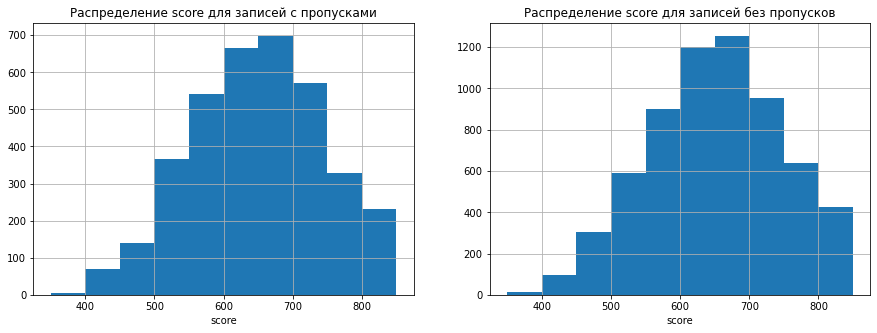

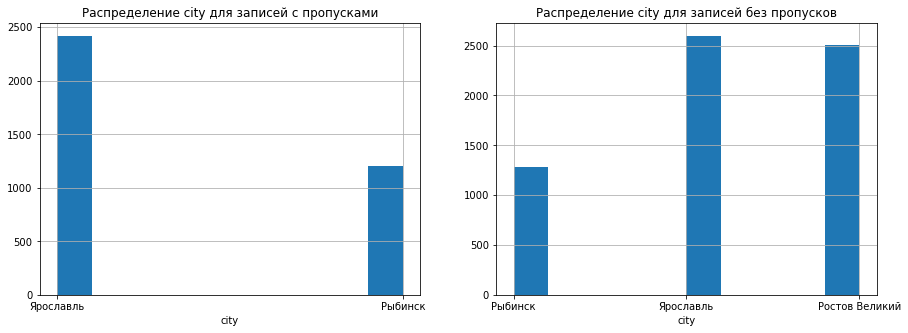

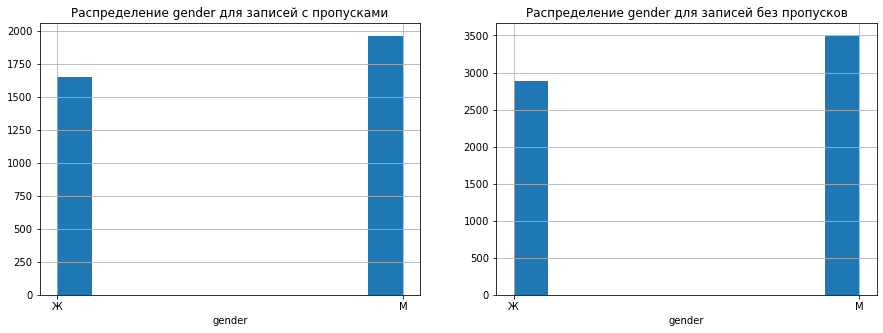

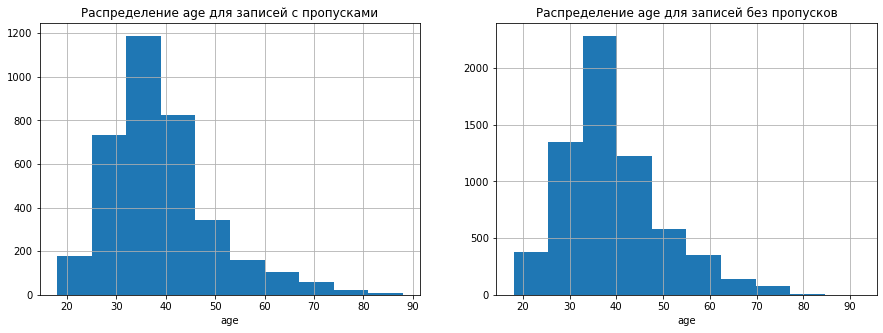

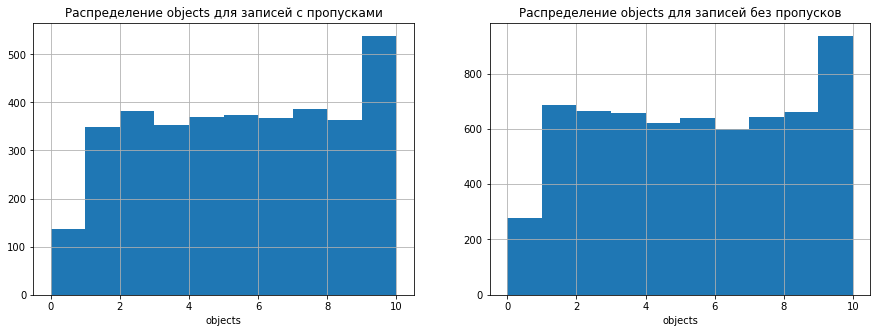

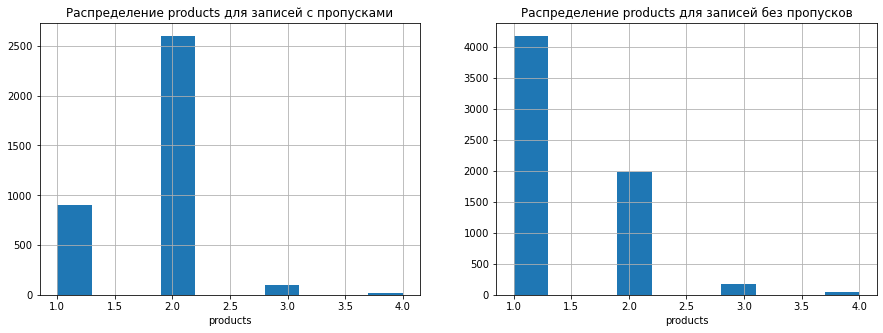

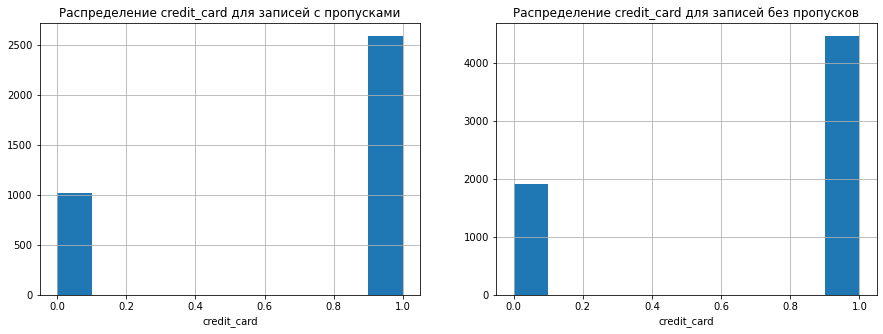

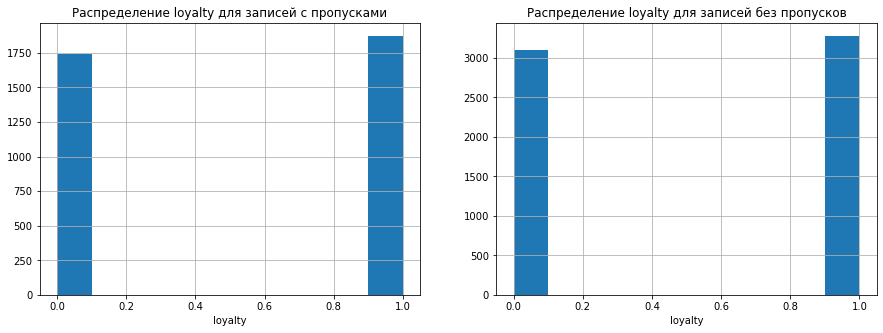

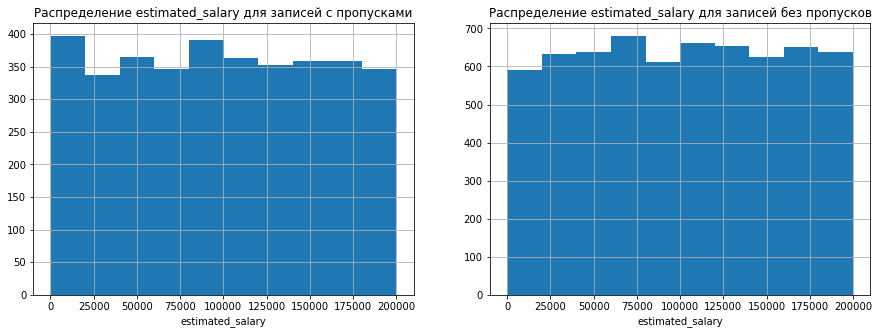

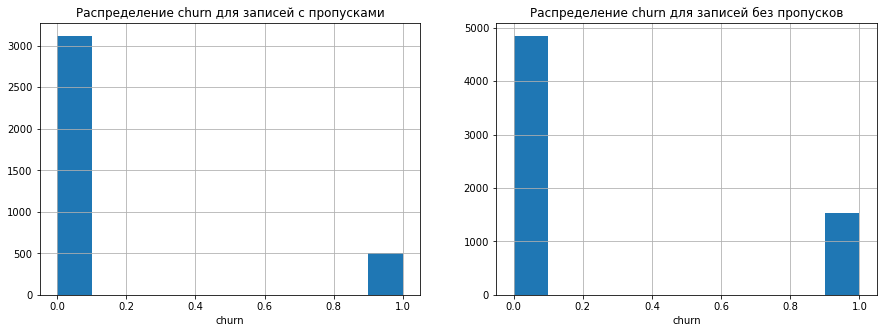

In [9]:
for c in df.drop(['user_id', 'balance'], axis=1).columns:
    fig, ax = plt.subplots(figsize = (15,5))
    df_na[c].hist(ax=plt.subplot(1, 2, 1))
    plt.title(f'Распределение {c} для записей с пропусками')
    plt.xlabel(c)
    df_notna[c].hist(ax=plt.subplot(1, 2, 2))
    plt.title(f'Распределение {c} для записей без пропусков')
    plt.xlabel(c)
    plt.show()

По гистограммам видно, что соотношение параметров в срезах с пропусками и без пропусков в целом достаточно идентичное, кроме следующих различий:
- в данных по Ростову Великому нет ни одного пропуска
- много пропусков в данных пользователей двух продуктов и мало - в данных пользователей одного продукта.

Однако природу пропусков это не объясняет.

Проверим гипотезу: возможно, пропуски означают нулевой баланс.

In [10]:
df['balance'].min()

3768.69

Как видно, нулевых значений баланса в датафрейме нет, так что версия, что пропуски обозначают нулевой баланс - наиболее логичная. Но однозначно подтвердить предположение не представляется возможным, поэтому целесообразнее оставить пропуски.

### Обработка дубликатов

Проверим наличие дубликатов в данных

In [11]:
df.duplicated().sum()

0

Дополнительно есть смысл проверить дубликаты в поле `user_id` - убедиться в отсутствии "задвоенных" пользовталей

In [12]:
df['user_id'].duplicated().sum()

0

Можно сделать вывод, что дубликатов в датафрейме нет

### Обработка аномалий

Построим для различных параметров графики "ящик с усами", чтобы посмотреть распределение количественных параметров и обнаружить выбросы

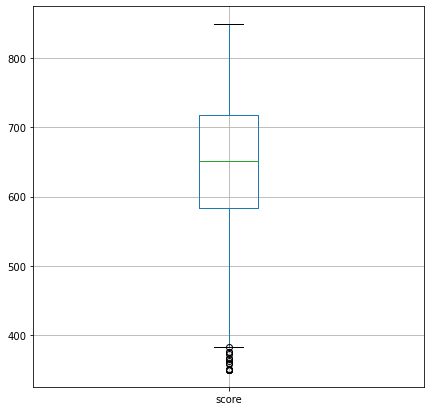

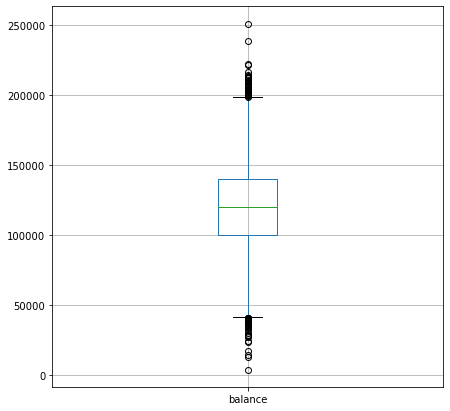

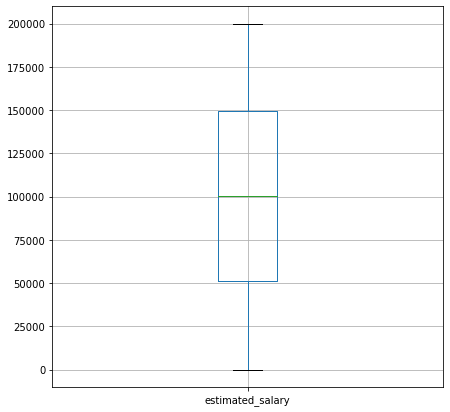

In [13]:
for c in ['score','balance', 'estimated_salary']:
    df.boxplot(column=c, figsize=(7, 7))
    plt.show()

Имеются выбросы в полях со скорингом и балансом.
При этом, крупных выбросов нет, в целом распределение количественных параметров достаточно равномерное.

### Категорирование данных

In [14]:
df.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Создадим дополнительные категории:
- по возрасту (молодой, средний, пенсионер)
- по уровню дохода (низкий, средний, высокий, очень высокий)

Для разделения напишем соответствующие функции.

In [15]:
def categorize_age(row):
    if row['age'] < 35:
        return 'young'
    elif row['age'] < 60:
        return 'middle'
    return 'old'

In [16]:
def categorize_salary(row):
    if row['estimated_salary'] < 50000:
        return 'low'
    elif row['estimated_salary'] < 100000:
        return 'middle'
    elif row['estimated_salary'] < 150000:
        return 'high'
    return 'very high'

In [17]:
df['age_category'] = df.apply(categorize_age, axis=1)
df['salary_category'] = df.apply(categorize_salary, axis=1)
df.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_category,salary_category
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,middle,high
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,middle,high
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,middle,high
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,middle,middle
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,middle,middle


### Промежуточный вывод

На этапе предобработки проведено улучшение имеющихся данных, а именно:

- к единому формату приведены названия полей
- проверено соответствие типов данных
- проверены пропуски в поле `balance`, принято решение их не заполнять
- проверено отсутствие дубликатов в данных, в том числе в поле `user_id`
- проверено распределение данных, крупных аномалий не обнаружено
- проведено категорирование данных, созданы вспомогательные поля `age_category` и `salary_category`

## Исследовательский анализ данных

### Исследование распределения каждого из параметров

In [18]:
df.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_category,salary_category
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,middle,high
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,middle,high
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,middle,high
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,middle,middle
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,middle,middle


Для оптимизации исследования распределения создадим 2 функции построения графиков: обе будут принимать на вход название поля, первая будет возвращать гистограмму, вторая - круговую диаграмму

In [19]:
def get_hist(param, bins):
    plt.hist(df[param], bins=bins)
    plt.xlabel(param)
    plt.title(f'Распределение по параметру {param}')

In [20]:
def get_pie(param):
    df_x = df.groupby(param).count().reset_index().sort_values(by='user_id', ascending=False)
    plt.pie(x=df_x['user_id'], labels=df_x[param], autopct='%1.2f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
    plt.title(f'Распределение по параметру {param}');

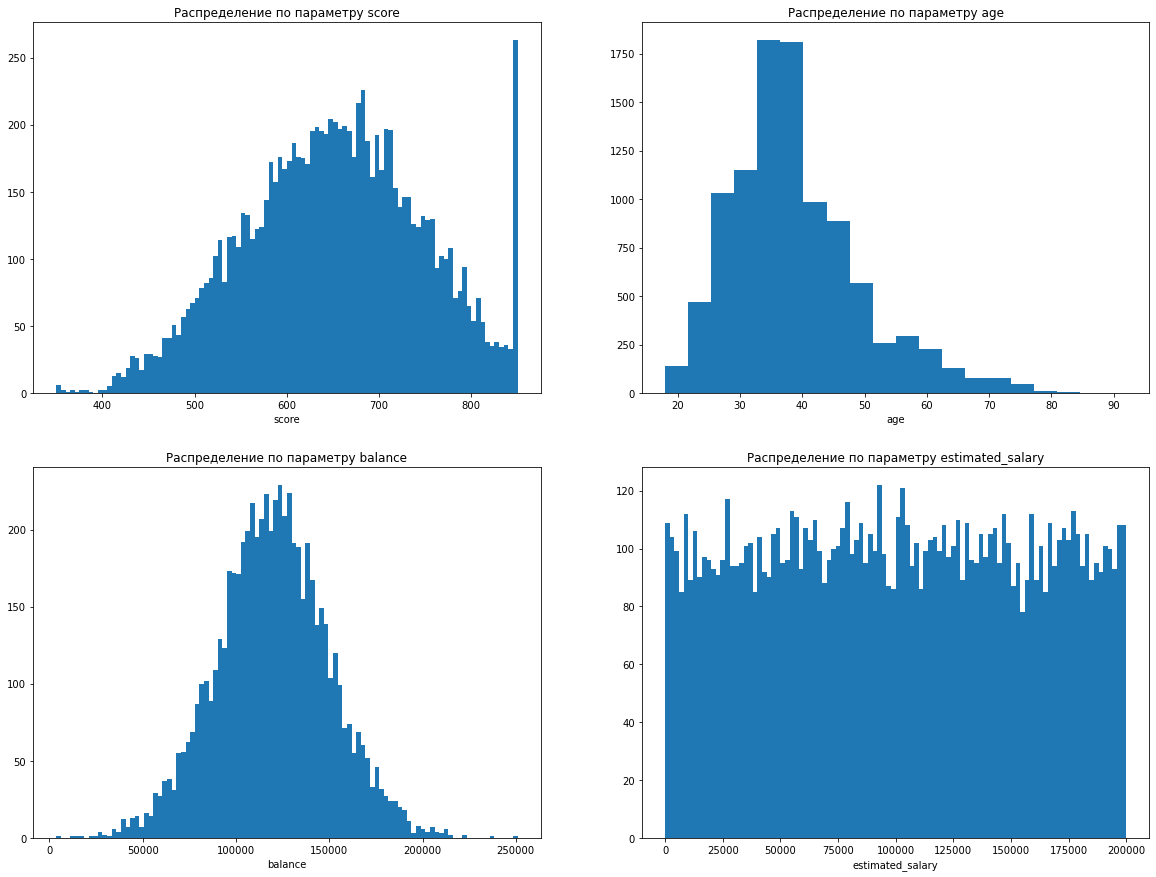

In [21]:
fig, axes = plt.subplots(figsize=(20, 15))
e = [['score', 100], ['age', 20], ['balance', 100], ['estimated_salary', 100]]
for i in range(len(e)):
    plt.subplot(2, 2, i + 1)
    get_hist(e[i][0], e[i][1])

Изучив представленные графики, можно сделать следующие выводы по каждому из параметров:
- по кредитному скорингу:
    - можно заметить пик клиентов с максимальным скорингом - значение около 850. Значит, в банке много надежных клиентов, пользующихся максимальным доверием
    - клиентов со значением скоринга ниже 400 почти нет. Также мало клиентов со скорингом от 400 до 500 и от 800 до 850. Данные в целом распределены нормально
    - помимо пика в районе максимального показателя, большинство значений находятся в диапазоне от 580 до 720
- по возрасту:
    - большинство клиентов - люди в возрасте от 26 до 52 лет. Пик приходится на возраст 33-40.
    - клиентов старше 65 почти нет
- по балансу:
    - баланс клиентов распределен нормально, с пиком в районе 120 000 у.е.
    - практически нет балансов меньше 40 000 и больше 190 000 у.е.
- по оценочной зарплате
    - зарплаты распределены равномерно, в диапазоне от 0 до 200 000 у.е.

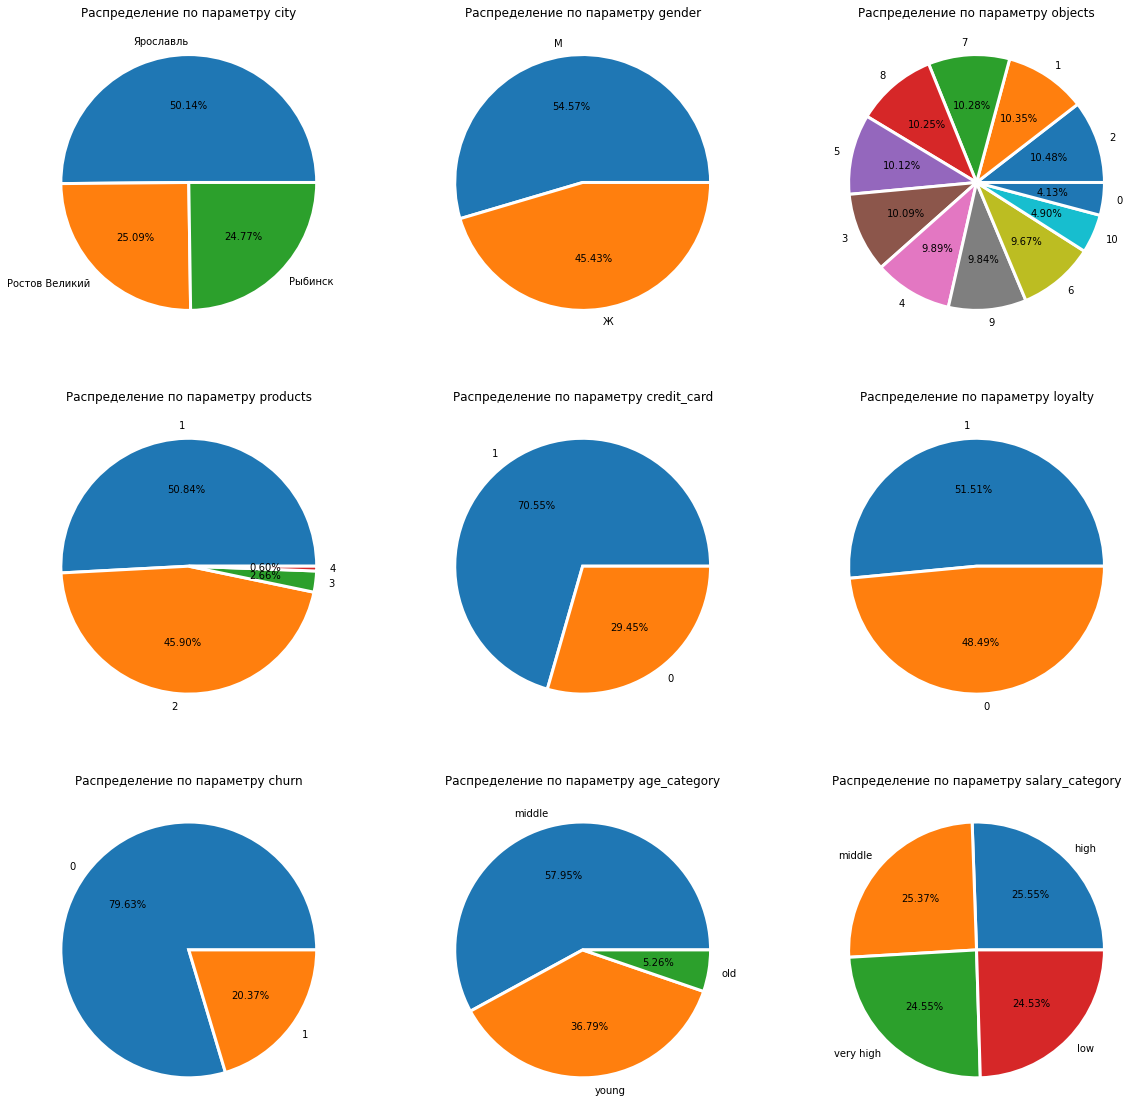

In [22]:
fig, axes = plt.subplots(figsize=(20, 20))
c = ['city', 'gender', 'objects', 'products', 'credit_card', 'loyalty', 'churn', 'age_category', 'salary_category']
for i in range(len(c)):
    plt.subplot(3, 3, i + 1)
    get_pie(c[i])

Изучив представленные графики, можно сделать следующие выводы по каждому из параметров:

- по городу:
    - половину от всех имеющихся данных занимает Ярославль
    - остальные данные делятся примерно поровну между Рыбинском и Ростовом Великим (В Рыбинске чуть меньше)
- по полу клиента:
    - мужчин среди клиентов банка чуть больше, чем женщин - 54,57% против 45,43 %
- по числу объектов в собственности:
    - распределение по количеству объектов достаточно однородное, без ярко выраженных лидеров
    - клиентов с 1, 2 и 7 объектами чуть больше, чем остальных 
    - клиентов с 0 или 10 объектами существенно меньше, чем остальных
- по числу продуктов:
    - подавляющее большинство клиентов - с 1 или 2 продуктами (50,84% и 45,90% соответственно)
    - клиентов с 3 или 4 продуктами пренебрежительно мало
- по наличию кредитной карты:
    - более чем 2/3 пользователей имеют кредитную карту
- по активности:
    - активных клиентов чуть больше половины
- по оттоку:
    - покинули банк только 20% клиентов
- по категории возраста:
    - более половины от общего количества клиентов - в возрасте от 35 до 60 лет
    - молодых клиентов - около 37%
    - клиентов после 60 совсем мало - чуть более 5%
- по категории дохода:
    - в части дохода клиенты распределены между 4-м категориями (до 50т., 50-100т., 100-150т., более 150т.) практически поровну

### Матрица корреляций

Перед построением матрицы корреляций, целесообразно предварительно обработать категориальные поля, закодировав их методом get_dummies(). Кодировать будем поля с городом и полом клиента.

In [23]:
df_corr = pd.get_dummies(df, columns=['city'])
df_corr = pd.get_dummies(df_corr, columns=['gender'], drop_first=True)
df_corr.head()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_category,salary_category,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_М
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,middle,high,0,0,1,0
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,middle,high,0,1,0,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,middle,high,0,0,1,0
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,middle,middle,0,0,1,0
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,middle,middle,0,1,0,0


Для анализа взаимосвязи параметров, построим матрицу корреляций методом Спирмена.
Для наглядности выведем ее в виде тепловой карты.

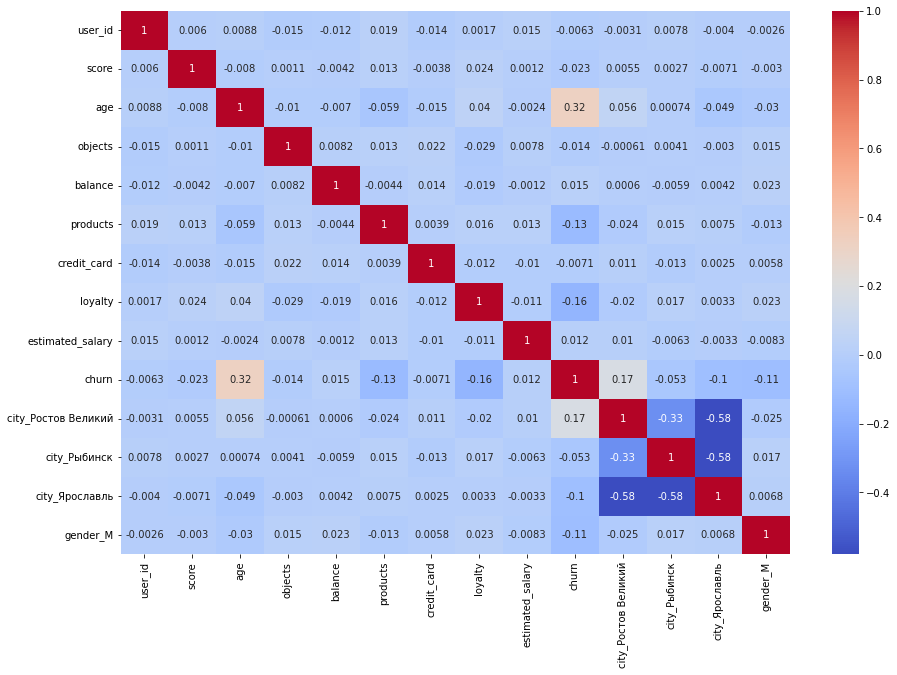

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(method='spearman'), annot=True, cmap='coolwarm');

Сильных корреляций оттока клиентов нет. Имеются слабые корреляции между оттоком клиентов и следующими параметрами:
- возраст клиента (прямая корреляция, коэффициент 0,32): банк чаще покидают клиенты старшего возраста
- количество потребляемых продуктов (обратная корреляция, коэффициент -0,13): банк чаще покидают клиенты с малым числом продуктов
- активность клиента (обратная корреляция, коэффициент -0,16): банк чаще покидают неактивные клиенты
- город (прямая корреляция, коэффициент 0,17): из трех городов, банк чаще покидают клиенты из Ростова Великого, а клиенты из Ярьославля - реже всего
- пол клиента (обратная корреляция,  коэффициент -0,11) - для клиентов-мужчин отток менее характерен, для клиентов-женщин картина противоположная.

Прочие корреляции близки к нулю.

### Промежуточный вывод

По результатам иследовательского анализа данных, удалось установить следующее:

- в части распределения параметров:
    - в банке много надежных клиентов, пользующихся максимальным доверием (скоринг 850). Помимо них, большинство клиентов со значением скоринга в районе 580-720 баллов
    - большинство клиентов - в возрасте от 26 до 52 лет. Пик приходится на возраст 33-40. Клиентов старше 65 почти нет
    - пик баланса на счетах клиентов приходится на значение 120 000 у.е. Большинство балансов - в пределах 40 000 - 190 000 у.е.
    - зарплаты клиентов распределены равномерно, в диапазоне от 0 до 200 000 у.е.
    - половина всех клиентов - из Ярославля. Остальные распределены примерно поровну между Ростовом Великим и Рыбинском
    - мужчин среди клиентов банка чуть больше, чем женщин - 54,57% против 45,43 %
    - распределение по количеству объектов достаточно однородное, без ярко выраженных лидеров. Клиентов с 1, 2 и 7 объектами чуть больше, чем остальных
    - подавляющее большинство клиентов - с 1 или 2 продуктами (50,84% и 45,90% соответственно). Клиентов с 3 или 4 продуктами пренебрежительно мало
    - более чем 2/3 пользователей имеют кредитную карту
    - активных клиентов чуть больше половины
    - покинули банк только 20% клиентов
    - в части дохода клиенты распределены между 4-м категориями (до 50т., 50-100т., 100-150т., более 150т.) практически поровну

- в части корреляции оттока клиентов с прочими параметрами:
    - имеются слабые прямые корреляции оттока с возрастом и городом клиента
    - имеются слабые обратные корредяции оттока с количеством потребляемых продуктов, активностью и полом клиента

## Сегментирование пользователей и анализ оттока

### Сегментирование пользователей и построение графиков оттока

На данном этапе сегментируем пользователей по количеству потребляемых продуктов и (дополнительно) по другим параметрам, с которыми имелась заметная корреляция оттока: пол, категория возраста, город и активность

Для сегментирования пользователей и визуализации уровня оттока по каждой из полученных групп, создадим функцию `get_churn_perc`. Данная функция будет принимать на вход датафрейм `data` и наименование необходимого поля `col`. В теле функции будет происходить группировка по двум полям: количество продуктов и поле `col`, затем высчитываться процент оттока для конкретной группы и выводиться соответствующие визуализацияи - уровень оттока в процентах и в абсолютных значениях.

In [25]:
def get_churn_perc(data, col):
    data = data.groupby(['products', col]).agg({'churn': ['sum', 'count']})
    data.columns = ['churn', 'all']
    data['perc'] = round(data['churn'] / data['all'] * 100, 2)
    data = data.reset_index()
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.title(f'Распределение оттока по параметру {col} (%)')
    ax = sns.barplot(x='products', y='perc', hue=col, data=data) 
    plt.subplot(1, 2, 2)
    plt.title(f'Распределение оттока по параметру {col} (абс. значения)')
    ax = sns.barplot(x='products', y='churn', hue=col, data=data) 

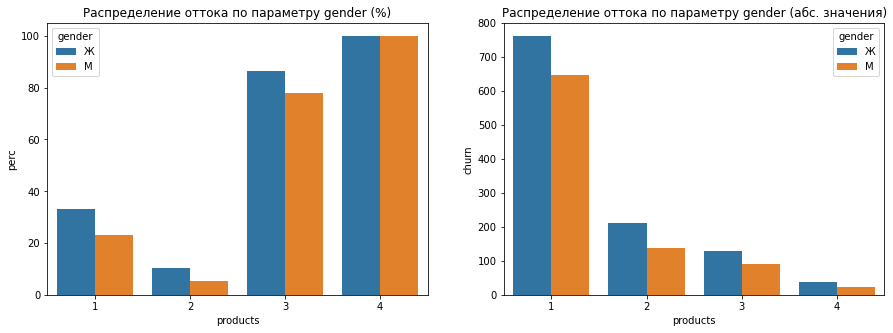

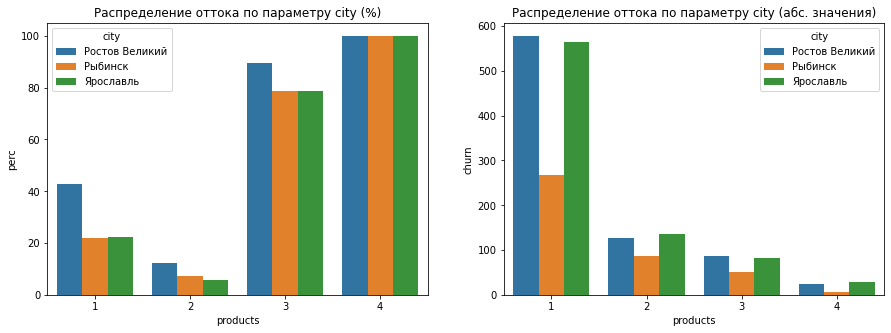

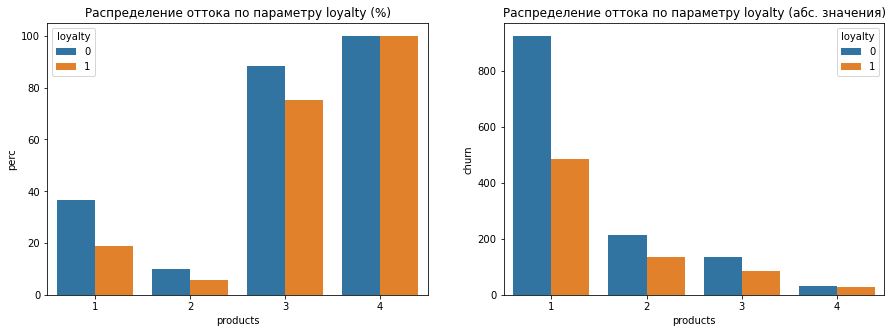

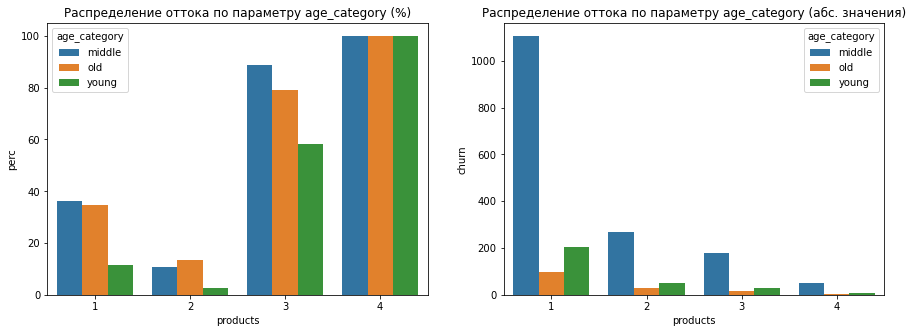

In [26]:
for col in ['gender', 'city', 'loyalty', 'age_category']:
    get_churn_perc(df, col)

Из графиков можно сделать выводы:
- **для клиентов с 4-мя продуктами**: отток составляет 100% в любом сегменте. При этом, по абсолютным показателям, таких клиентов совсем мало.
- **для клиентов с 3-мя продуктами**: отток несколько ниже (от 60 до 90%), и здесь уже имеются определенные различия между сегментами: чуть выше отток клиентов-женщин, клиентов из Ростова Великого и неактивных клиентов. В разрезе возраста, сильнее отток клиентов среднего возраста и пенсионеров. Однако, в целом, в банке пользователей с 3-ми продуктами также немного.
- **для клиентов с 2-мя продуктами**: отток самый низкий (не более 10% в любом сегменте). Здесь тенденции аналогичны сегменту пользователей 3-х продуктов, единственное исключение - отток среди пенсионеров чуть выше, чем среди клиентов среднего возраста; а отток молодых клиентов незначителен. Абсолютные значения оттока этих пользователей сопоставимы с оттоком предыдущего сегмента. 
- **для клиентов с 1-м продуктом**: отток на среднем уровне (10-45% в зависимости от типа разбиения). Тенденции, характерные для двух предыдущих сегментов, здесь сохраняются (отток женщин по-прежнему чуть ниже, чем мужчин) и частично усиливаются: отток в Ростове Великом 40% при значениях 20% в остальных двух городах, отток неактивных клиентов чуть меньше 40% при значении 20% среди активных. Отток клиентов среднего и старшего возраста также приближается к 40% при значениях оттока молодых клиентов около 10%. Абсолютные значения оттока в этом сегменте - максимальные среди всех

Кроме того, из графиков с абсолютными значениями можно отметить:
- по общему количеству, отток клиентов с 1-м продуктом превышает все остальные вместе взятые
- отток клиентов из Рыбинска в процентах держится на уровне с Ярославлем, но по общему количеству, клиентов оттуда в два раза меньше
- больше всего потерь (по абсолютным значениям) - среди клиентов срденего возраста с одним продуктом - ушло почти 1200

### Рекомендованные меры по удержанию

По результатам анализа, можно сделать следующие выводы и рекомендации:
- как удалось установить, банк массово покидают клиенты с большим количеством продуктов - 3 или 4. Однако таких клиентов в банке совсем мало, и их потеря наименне заметна. Вместе с тем, поголовный отток клиентов с большим количеством продуктов выглядит подозрительно. Возможно, отток в этом сегменте вызван низким качеством каких-то из продуктов. **Следует запросить дополнительную информацию о продуктах и рассмотреть, пользователи какого из продуктов боле склонны к оттоку**
- наибольшие убытки может принести массовый отток клиентов с 1 или 2 продуктами. При этом, из них чаще уходят клиенты с 1 продуктом. Это логично, ведь имея лишь один продукт, они меньше привязаны к банку. **Есть смысл подобрать для клиентов с 1 продуктом персональные предложения по приобретению дополнительного продукта**
- женщины чуть более склонны покидать ряды клиентов банка. **Целесообразно проработать возможность бонусных акций для женской аудитории**
- много уходит клиентов из города Ростов Великий, абсолютные значения - наравне с Ярославлем, областным центром. Кроме того, отток клиентов из Рыбинска в процентах держится на уровне с Ярославлем, но по общему количеству, клиентов оттуда в два раза меньше. **Следует уделить внимание этим городам, возможно в региональных отделениях банка низкое качество сервиса**
- молодежь редко покидает банк, а вот клиенты среднего и старшего возраста - гораздо чаще. **Есть смысл разработать рекламные акции, нацеленные на старшую аудиторию**

### Портреты клиентов и рекомендации


Для составления портрета каждого из сегментов, выделенных по количеству продуктов, сделаем соответствующие визуализации распределения праметров. Для этого модифицируем ранее использовавшиеся функции `get_hist` и `get_pie`. Итоговые функции будут для наглядности строить по 4 графика в ряд - по одному для каждого количества продуктов.

In [27]:
def get_hist_part(param, bins):
    fig, axes = plt.subplots(figsize=(20, 4))
    fig.suptitle(f'Распределение по параметру {param} для пользователей с числом продуктов от 1 до 4', y=1.1, fontsize=20)
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.hist(df.query('products == @i + 1')[param], bins=bins)
        plt.xlabel(param)
        plt.title(f'Число продуктов = {i+1}')

In [28]:
def get_pie_part(param):
    fig, axes = plt.subplots(figsize=(20, 20))
    fig.suptitle(f'Распределение по параметру {param} для пользователей с числом продуктов от 1 до 4', y=0.655, fontsize=20)
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        df_x = df.query('products == @i + 1').groupby(param).count().reset_index().sort_values(by='user_id', ascending=False)
        plt.pie(x=df_x['user_id'], labels=df_x[param], autopct='%1.2f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
        plt.title(f'Число продуктов = {i+1}');

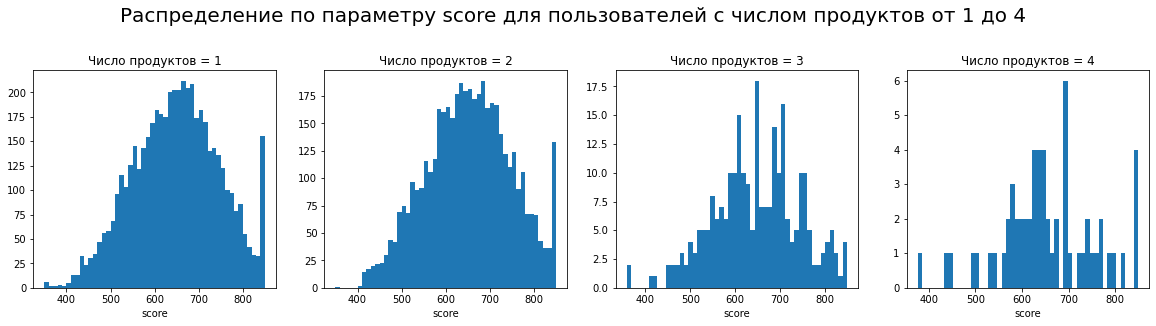

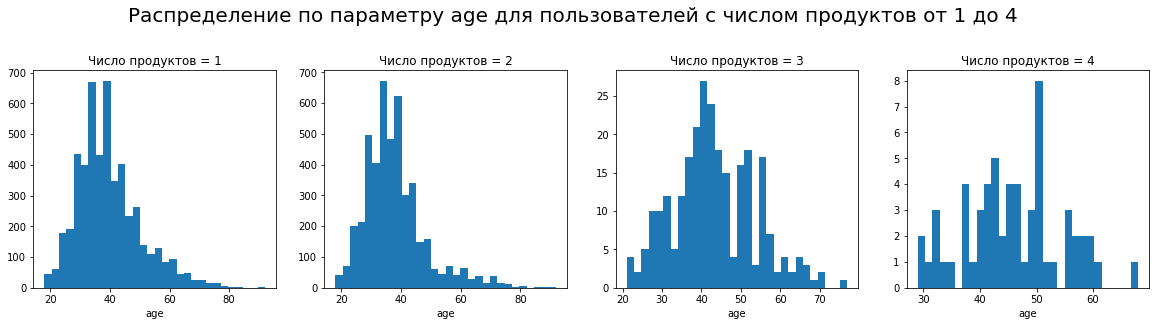

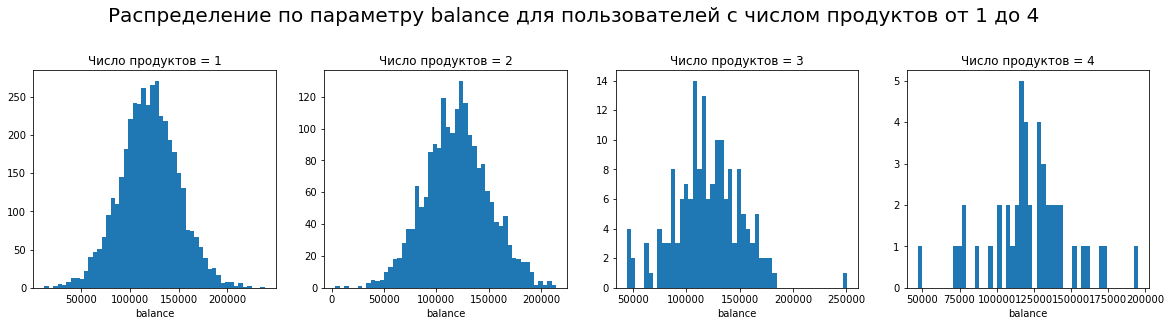

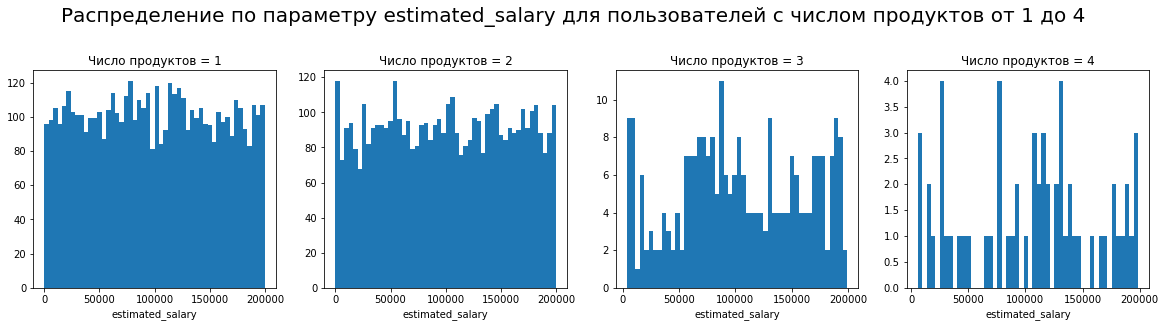

In [29]:
e = [['score', 50], ['age', 30], ['balance', 50], ['estimated_salary', 50]]
for i in range(len(e)):
    get_hist_part(e[i][0], e[i][1])

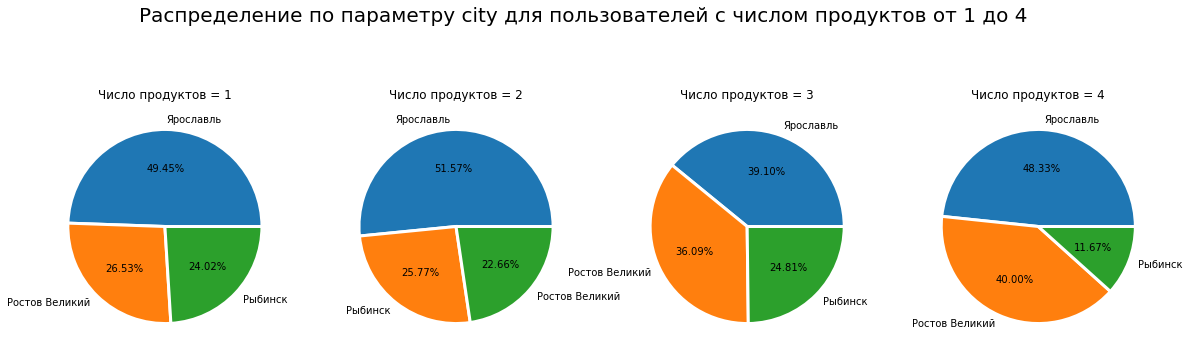

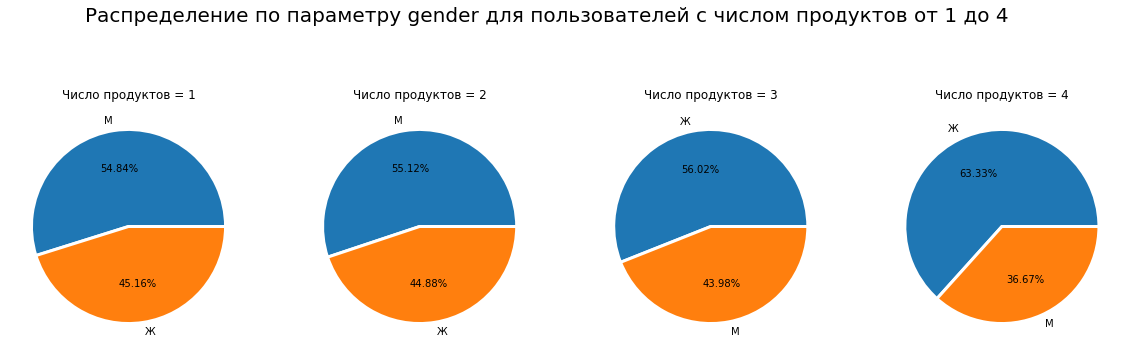

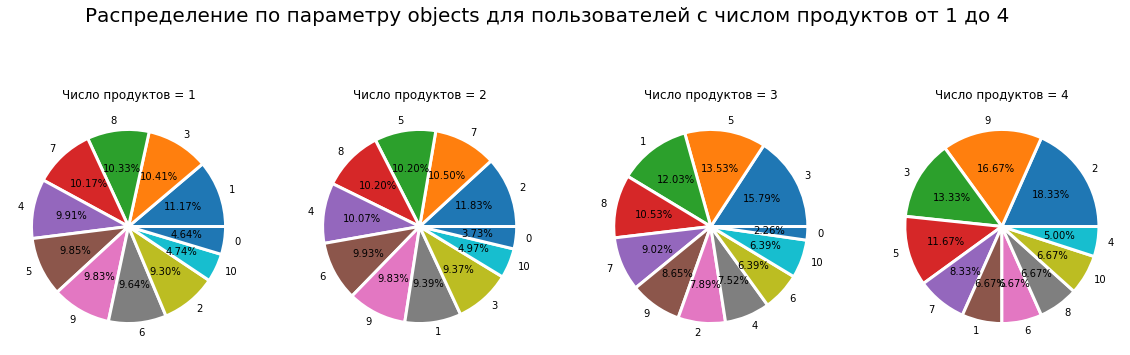

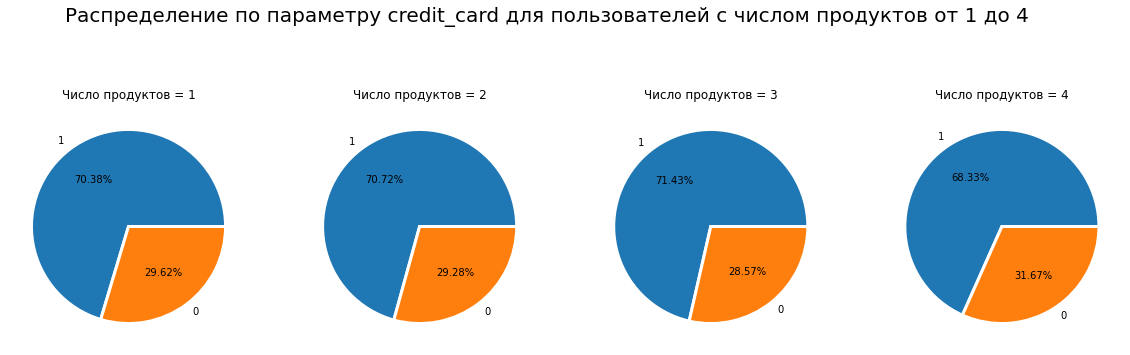

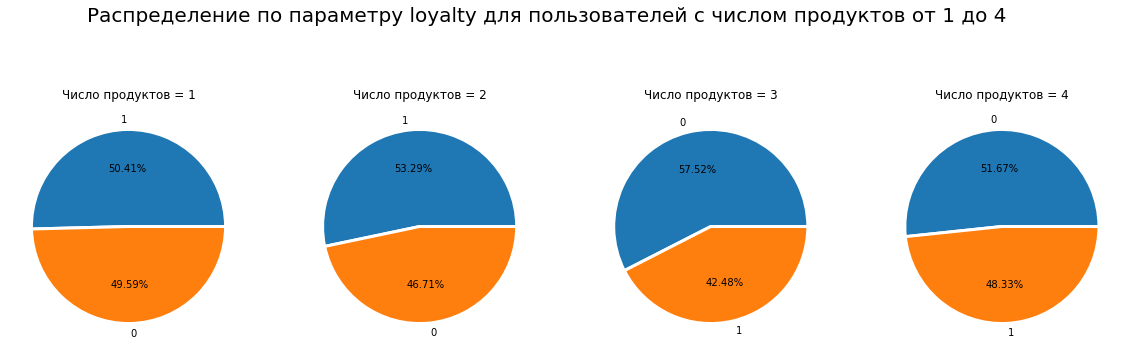

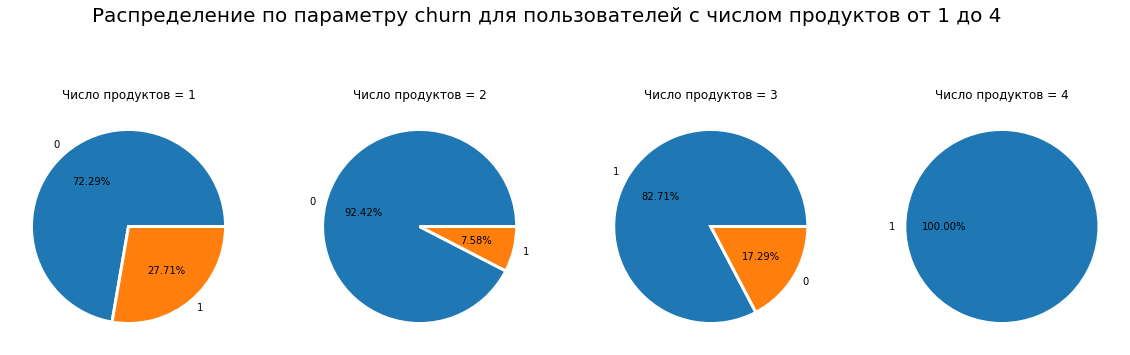

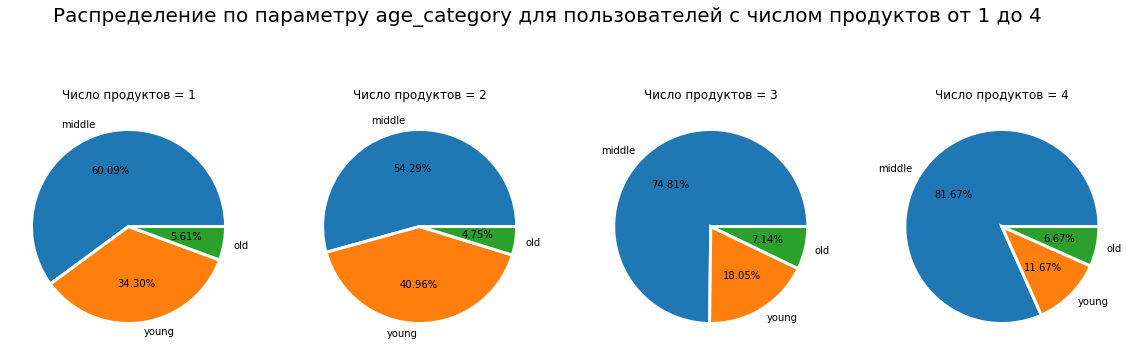

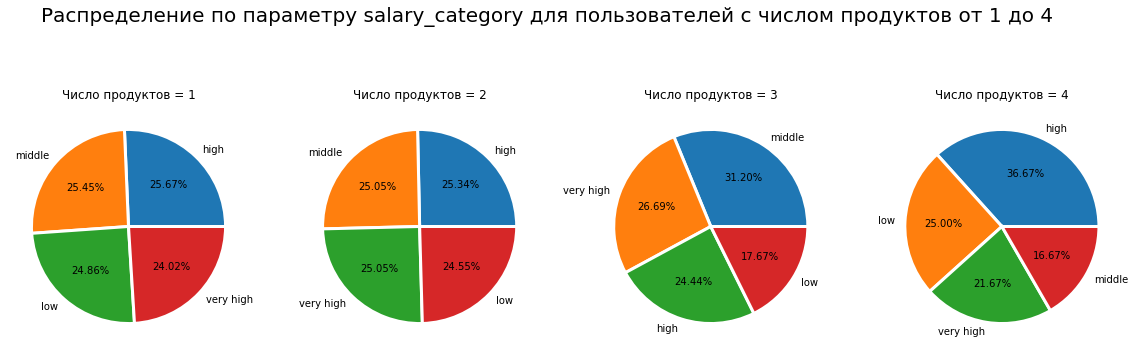

In [30]:
c = ['city', 'gender', 'objects', 'credit_card', 'loyalty', 'churn', 'age_category', 'salary_category']
for i in range(len(c)):
    get_pie_part(c[i])

**Итак, для клиентов с одним продуктом характерно:**
- большое количество показателей максимального скоринга (850). Основной пик их скоринга находится на отметке 650. Распределение скоринга похоже на нормальное.
- возраст - в основном до 50
- баланс - в основном от 70 000 до 150 000 у.е.
- распределение зарплаты почти равномерное от 0 до 200 000 у.е.
- чуть меньше половины всех клиентов из Ярославля, остальные - примерно поровну из двух других городов
- мужчин чуть больше, чем женщин
- по количеству объектов в собственности распределение между вариантами от 0 до 10 почти равное, с небольшим отрывом лидируют 1, 3 и 8 объектов
- 2/3 пользователей - с кредитной картой
- активных клиентов - половина
- в отток уходит чуть больше четверти всех клиентов
- 60% клиентов среднего возраста, 34% молодых, 6% пенсионеров
- по уровню з/п - равное распределение между категориями (до 50 000, до 100 000, до 150 000, выше 150 000)

**Для клиентов с двумя продуктами характерно:**
- большое количество показателей максимального скоринга (850). Основное распределение несколько смещено в строну высокого скоринга (600-750)
- возраст - в основном до 45
- баланс - в основном от 70 000 до 130 000 у.е.
- распределение зарплаты почти равномерное от 0 до 200 000 у.е., при этом много клиентов с низким уровнем зарплаты
- чуть больше половины всех клиентов из Ярославля, остальные - примерно поровну из двух других городов
- мужчин чуть больше, чем женщин
- по количеству объектов в собственности распределение между вариантами от 0 до 10 почти равное, с небольшим отрывом лидируют 2, 7 и 5 объектов
- 2/3 пользователей - с кредитной картой
- активных клиентов - чуть больше половины
- в отток уходит меньше 1/10 всех клиентов
- 54% клиентов среднего возраста, 41% молодых, 5% пенсионеров
- по уровню з/п - равное распределение между категориями (до 50 000, до 100 000, до 150 000, выше 150 000)

**Для клиентов с тремя продуктами характерно:**
- клиентов с максимальным скорингом почти нет. В основном скоринг 600-750
- возраст - в основном 35-60
- баланс - в основном 70 000 - 180 000 у.е.
- много клиентов с низким уровнем зарплаты, при этом в целом уровень зарплаты смещен в сторону выскоих значений
- почти поровну клиентов из Ярославля и Ростова Великого, из Рыбинска - чуть меньше
- мужчин чуть меньше, чем женщин
- по количеству объектов в собственности распределение достаточно неоднородное, большинство клиентов - с 3, 5 или 1 объектами 
- 2/3 пользователей - с кредитной картой
- активных клиентов существенно больше половины
- в отток уходит почти 1/5 всех клиентов
- 75% клиентов среднего возраста, 18% молодых, 7% пенсионеров
- по уровню з/п - больше всего клиентов со средней з/п, меньше всего - с низкой

**Для клиентов с четырьмя продуктами характерно:**
- значительная доля показателей максимального скоринга. В основном скоринг - 550-700
- возраст старше, чем в других группах - в основном 37-60 лет
- в среднем баланс выше, чем в других группах - 125 000 - 150 000 у.е.
- зарплата распределена достаточно равномерно от 0 до 200 000 у.е.
- почти поровну клиентов из Ярославля и Ростова Великого, из Рыбинска - значительно меньше
- мужчин почти в два раза меньше, чем женщин
- по количеству объектов в собственности распределение достаточно неоднородное, большинство клиентов - с 2, 9 или 3 объектами 
- 2/3 пользователей - с кредитной картой
- активных клиентов - половина
- в отток уходит 100% клиентов
- 82% клиентов среднего возраста, 12% молодых, 6% пенсионеров
- по уровню з/п - больше всего клиентов с высокой з/п, меньше всего - со средней.

**Рекомендации по результатам составления портретов клиентов:**
1. Следует детально изучить банковские продукты. Поскольку среди клиентов с 3 и особенно 4 продуктами - наивысший уровень оттока, это может сигнализировать о низком качестве этих менее распространенных продуктов
2. Наименьший отток - среди клиентов с 2 продуктами. Обратная ситуация - возможно, именно этот продукт удерживает клиентов.
3. Большая часть клиентов с большим количеством продуктов - из Ростова Великого. Следует уделить внимание локальным методам привлечения клиентов и, возможно, распространить их на всю сеть
4. Удержать клиентов может помочь повышение клиентской активности. Сейчас доля активных клиентов - около 50%  в каждой группе. Есть смысл проработать дополнительные акции для клиентов
5. В банке очень мало клиентов старшего возраста. Имеет смысл проработать механизм дополнительного привлечения таких клиентов - к примеру, с помощью пенсионных карт
6. Наиболее опасен отток клиентов с 1 продуктом - потому что их больше, чем остальных, и они активнее всех. Следует проработать механизм удержания таких клиентов - к примеру, дополнительные персональные предложения

## Статистическое исследование данных

### Проверка статистической гипотезы № 1 (Между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, есть различие в доходах)

**Нулевая гипотеза**: различий в доходах между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, нет. 

**Альтернативная гипотеза**: различия в доходах между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, есть.

Уровень статистической значимости alpha зададим как 0,05

Для проверки гипотезы, сформируем две выборки: в первую будут включены доходы клиентов с одним продуктом, во вторую - с двумя

In [31]:
df_1 = df.loc[df['products'] == 1, 'estimated_salary']
df_2 = df.loc[df['products'] == 2, 'estimated_salary']

Проверим гипотезу, используя критерий Манна-Уитни

In [32]:
print("P-value = ""{0:.3f}".format(stats.mannwhitneyu(df_1, df_2)[1]))
if stats.mannwhitneyu(df_1, df_2)[1] >= 0.05:
    print('Нет основания отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')

P-value = 0.408
Нет основания отвергнуть нулевую гипотезу


**Таким образом, нет оснований отвергать нулевую гипотезу и считать, что между клиентами с 1-м и 2-мя продуктами имеется различие в уровне дохода**

### Проверка статистической гипотезы № 2 (Доля активных клиентов среди тех, кто пользуется кредитной картой и тех, кто не пользуется, равна)

**Нулевая гипотеза**: доля активных клиентов среди тех, кто пользуется кредитной картой и тех, кто не пользуется, равна. 

**Альтернативная гипотеза**: доля активных клиентов среди тех, кто пользуется кредитной картой и тех, кто не пользуется, различается.

Уровень статистической значимости alpha зададим как 0,05

Для проверки гипотезы, сформируем две выборки: в первую будет включено количество активных клиентов среди тех, кто не пользуется кредитной картой и тех, кто пользуется; а во вторую войдет общее количество клиентов по каждой из групп

In [33]:
df_x = df.groupby('credit_card').agg({'loyalty': ['sum', 'count']})
df_x.columns = ['successes', 'trials']
df_x

,successes,trials
credit_card,,
0,1544,2945
1,3607,7055


In [34]:
successes = np.array(df_x['successes'])
trials = np.array(df_x['trials'])

Проверим гипотезу, используя z-тест на равенство долей

In [35]:
print('{0:0.3f}'.format(proportions_ztest(successes, trials)[1]))
if proportions_ztest(successes, trials)[1] >= 0.05:
    print('Нет основания отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')

0.235
Нет основания отвергнуть нулевую гипотезу


**Таким образом, нет оснований отвергать нулевую гипотезу и считать, что доля активных клиентов среди тех, кто пользуется кредитной картой и тех, кто не пользуется, различается.**

### Промежуточный вывод

На данном этапе проведено статистическое исследование данных, в результате которого проверено 2 гипотезы:
1. "*Между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, есть различие в доходах*". 

Гипотеза проверена, используя критерий Манна-Уитни, уровень статистической значимости alpha = 0,05. Результат проверки гипотезы: нет оснований считать, что между клиентами с 1-м и 2-мя продуктами имеется различие в уровне дохода.

2. "*Доля активных клиентов среди тех, кто пользуется кредитной картой и тех, кто не пользуется, равна*" 

Гипотеза проверена, используя z-критерий для равенства долей, уровень статистической значимости alpha = 0,05. Результат проверки гипотезы: нет оснований считать, что  доля активных клиентов среди тех, кто пользуется кредитной картой и тех, кто не пользуется, различается.

## Выводы и рекомендации

В ходе проекта были проанализированы данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Целью исследования являлся анализ данных клиентов регионального банка, выявление основных причин оттока клиентов и выработка рекомендаций по их удержанию.

Проект реализован в 5 этапов.

**На 1 этапе проведено изучение общей информации.**

Проведена загрузка данных, осуществлено первичное изучение данных базовыми описательными методами pandas. Выявлено наличие пропусков в поле с балансом.

**На 2 этапе проведена предобработка данных:**

- к единому формату приведены названия полей
- проверено соответствие типов данных
- проверены пропуски в поле `balance`, принято решение их не заполнять
- проверено отсутствие дубликатов в данных, в том числе в поле `user_id`
- проверено распределение данных, крупных аномалий не обнаружено
- проведено категорирование данных, созданы вспомогательные поля `age_category` и `salary_category`

**На 3 этапе проведен исследовательский анализ данных, в ходе которого установлены следующие общие закономерности:**

- в части распределения параметров:
    - в банке много надежных клиентов, пользующихся максимальным доверием (скоринг 850). Помимо них, большинство клиентов со значением скоринга в районе 580-720 баллов
    - большинство клиентов - в возрасте от 26 до 52 лет. Пик приходится на возраст 33-40. Клиентов старше 65 почти нет
    - пик баланса на счетах клиентов приходится на значение 120 000 у.е. Большинство балансов - в пределах 40 000 - 190 000 у.е.
    - зарплаты клиентов распределены равномерно, в диапазоне от 0 до 200 000 у.е.
    - половина всех клиентов - из Ярославля. Остальные распределены примерно поровну между Ростовом Великим и Рыбинском
    - мужчин среди клиентов банка чуть больше, чем женщин - 54,57% против 45,43 %
    - распределение по количеству объектов достаточно однородное, без ярко выраженных лидеров. Клиентов с 1, 2 и 7 объектами чуть больше, чем остальных
    - подавляющее большинство клиентов - с 1 или 2 продуктами (50,84% и 45,90% соответственно). Клиентов с 3 или 4 продуктами пренебрежительно мало
    - более чем 2/3 пользователей имеют кредитную карту
    - активных клиентов чуть больше половины
    - покинули банк только 20% клиентов
    - в части дохода клиенты распределены между 4-м категориями (до 50т., 50-100т., 100-150т., более 150т.) практически поровну
- в части корреляции оттока клиентов с прочими параметрами:
    - имеются слабые прямые корреляции оттока с возрастом и городом клиента
    - имеются слабые обратные корредяции оттока с количеством потребляемых продуктов, активностью и полом клиента

**На 4 этапе проведено сегментирование пользователей и анализ оттока:**

- как удалось установить, банк массово покидают клиенты с большим количеством продуктов - 3 или 4. Однако таких клиентов в банке совсем мало, и их потеря наименне заметна. 
- наибольшие убытки может принести массовый отток клиентов с 1 или 2 продуктами. При этом, из них чаще уходят клиенты с 1 продуктом. Это логично, ведь имея лишь один продукт, они меньше привязаны к банку. 
- женщины чуть более склонны покидать ряды клиентов банка. 
- много уходит клиентов из города Ростов Великий, абсолютные значения - наравне с Ярославлем, областным центром. Кроме того, отток клиентов из Рыбинска в процентах держится на уровне с Ярославлем, но по общему количеству, клиентов оттуда в два раза меньше. 
- молодежь редко покидает банк, а вот клиенты среднего и старшего возраста - гораздо чаще. 

**Кроме того, составлены портреты клиентов каждого из сегментов, выделенных по количеству продуктов. Установлены характерные особенности:**
- *для клиентов с одним продуктом:*
    - большое количество показателей максимального скоринга (850). Основной пик скоринга находится на отметке 650. 
    - баланс - в основном от 70 000 до 150 000 у.е.
    - чуть меньше половины всех клиентов из Ярославля, остальные - примерно поровну из двух других городов
    - мужчин чуть больше, чем женщин
    - активных клиентов - половина
    - в отток уходит чуть больше четверти всех клиентов
    - 60% клиентов среднего возраста, 34% молодых, 6% пенсионеров
    - по уровню з/п - равное распределение между категориями (до 50 000, до 100 000, до 150 000, выше 150 000)


- *для клиентов с двумя продуктами:*
    - большое количество показателей максимального скоринга (850). Много высоких значений(600-750)
    - баланс - в основном от 70 000 до 130 000 у.е.
    - чуть больше половины всех клиентов из Ярославля, остальные - примерно поровну из двух других городов
    - мужчин чуть больше, чем женщин
    - активных клиентов - чуть больше половины
    - в отток уходит меньше 1/10 всех клиентов
    - 54% клиентов среднего возраста, 41% молодых, 5% пенсионеров
    - по уровню з/п - равное распределение между категориями (до 50 000, до 100 000, до 150 000, выше 150 000)


- *для клиентов с тремя продуктами:*
    - клиентов с максимальным скорингом почти нет. В основном скоринг 600-750
    - баланс - в основном 70 000 - 180 000 у.е.
    - почти поровну клиентов из Ярославля и Ростова Великого, из Рыбинска - чуть меньше
    - мужчин чуть меньше, чем женщин
    - активных клиентов существенно больше половины
    - в отток уходит почти 1/5 всех клиентов
    - 75% клиентов среднего возраста, 18% молодых, 7% пенсионеров
    - по уровню з/п - больше всего клиентов со средней з/п, меньше всего - с низкой


- *для клиентов с четырьмя продуктами:*
    - значительная доля показателей максимального скоринга. В основном скоринг - 550-700
    - в среднем баланс выше, чем в других группах - 125 000 - 150 000 у.е.
    - почти поровну клиентов из Ярославля и Ростова Великого, из Рыбинска - значительно меньше
    - мужчин почти в два раза меньше, чем женщин
    - активных клиентов - половина
    - в отток уходит 100% клиентов
    - 82% клиентов среднего возраста, 12% молодых, 6% пенсионеров
    - по уровню з/п - больше всего клиентов с высокой з/п, меньше всего - со средней.

**На 5 этапе в ходе статистического анализа проверены гипотезы:**

- гипотезу "Между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, есть различие в доходах" не удалось ни подтвердить, ни опровергнуть
- гипотезу "Доля активных клиентов среди тех, кто пользуется кредитной картой и тех, кто не пользуется, равна" не удалось ни подтвердить, ни опровергнуть

**Основные рекомендации по противодействию оттоку клиентов:**
- запросить дополнительную информацию о продуктах и рассмотреть, пользователи какого из них более склонны к оттоку; сделать дополнительные выводы
- подобрать для клиентов с 1 продуктом персональные предложения по приобретению дополнительного продукта
- проработать возможность бонусных акций для женской аудитории
- уделить внимание уровню обслуживания в Рыбинске и Ростове Великом, возможно в региональных отделениях банка низкое качество сервиса
- разработать рекламные акции и специальные предложения, нацеленные на старшую аудиторию

**Ссылка на презентацию:** https://disk.yandex.ru/i/IYXoJGQDC20U-w

**Ссылка на дашборд:** https://public.tableau.com/app/profile/alex4377/viz/DashboardBankProject/Dashboard2     